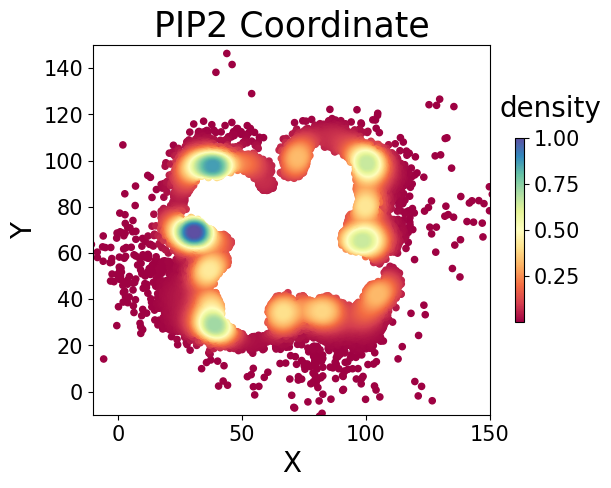

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
coord=pd.read_table('pip2_coordinate.txt',sep='\s+',header=None)
coord.columns=['Frame','Pip2','x','y','z']
coord
coord_xy=coord[['x','y']]
x=coord_xy['x']
y=coord_xy['y']
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
z = preprocessing.maxabs_scale(z,axis=0,copy = True)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
fig, ax = plt.subplots()
plt.scatter(x, y,c=z,  s=20,cmap='Spectral')
plt.tick_params(labelsize = 15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(-10,150)
plt.ylim(-10,150)
plt.xlabel('X',size = 20)
plt.ylabel('Y',size = 20)
cb = plt.colorbar(shrink=0.5)
cb.ax.tick_params(labelsize=15)
plt.figtext(0.76,0.73,'density',size=20)
plt.title('PIP2 Coordinate',size = 25)#显示图表标题
plt.show()